# Workbook #3
This workbook goes over examining two and more variables at a time. We will then examine interactions.

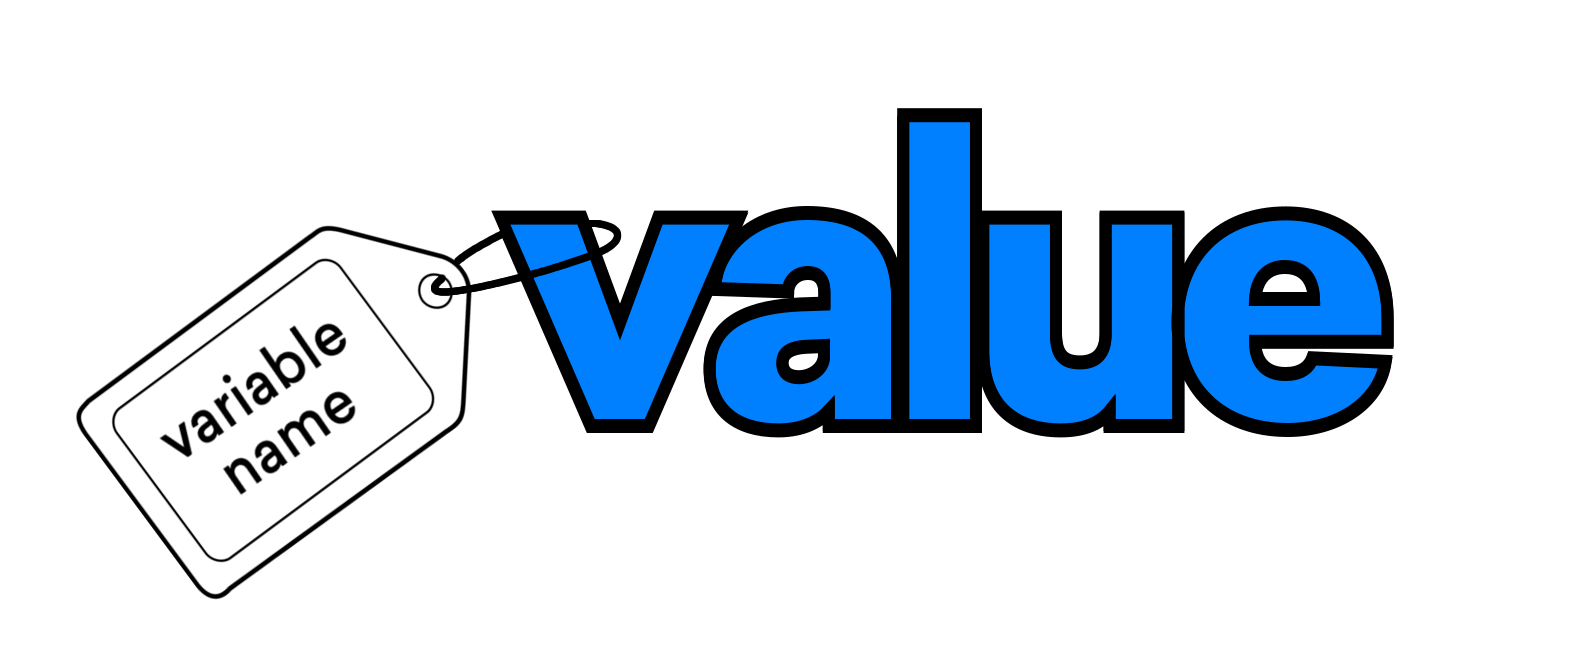

Last week, we talked about variables. There are categorical and numeric variables. When we modeling relationships, it has to be between at least two different variables.
* Relationship between two categorical variables
* Relationship between two numeric variables
* Relationship between one categorical and one numeric variable.

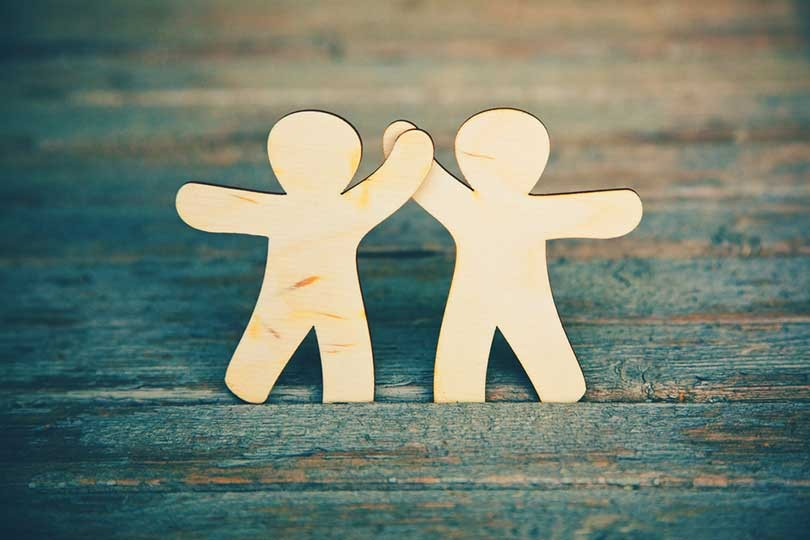

### Relationship between two categorical variables
When establishing an association/relationship between two categorical variables, you look for the following:
* If one variable changes, then the other variable changes. (based on theory)
* If one variable DOES NOT change, then the other variable DOES NOT change. (null relationship)

<b>Table 3.1a: Hypothetical strong association

|  | men | women | total |
| --- | --- | --- | --- |
| Democractic | 300 | 1000 | 1300 |
|  | 23% | 77% |  |
| Republication | 700 | 200 | 900 |
|  | 78% | 22% | |

<b>Table 3.1b: Hypothetical no association (null relationship)

|  | men | women | total |
| --- | --- | --- | --- |
| Democractic | 500 | 500 | 1000 |
|  | 50% | 50% |  |
| Republication | 500 | 500 | 1000 |
|  | 50% | 50% | |

<b>Table 1c:  (ACTUAL) Gender and Party Affiliation in 2016

|  | men | women | total |
| --- | --- | --- | --- |
| Democractic | 550 | 814 | 1364 |
|  | 40% | 60% |  |
| Republication | 457 | 469 | 926 |
|  | 49% | 51% | |

Note: data from General Social Survey 2016

*You can use chi-2 test in Stata to find out if there is a statistically significant relationship between the two vairables (tab var1 var2, chi2). 

### Relationship between two numeric variables
When examining relationships between two numerical variables, we are able to do more "traditional" statistics with them. 
* A relationship between numerical variables exists if we are able to say whether a change in a variable represents an increase or a decrease in value of another variable.

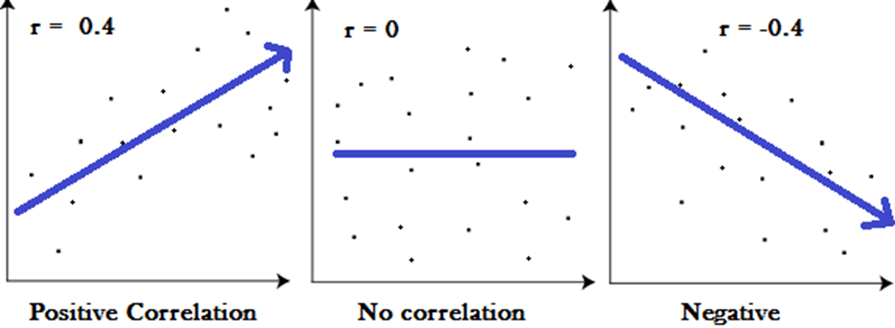

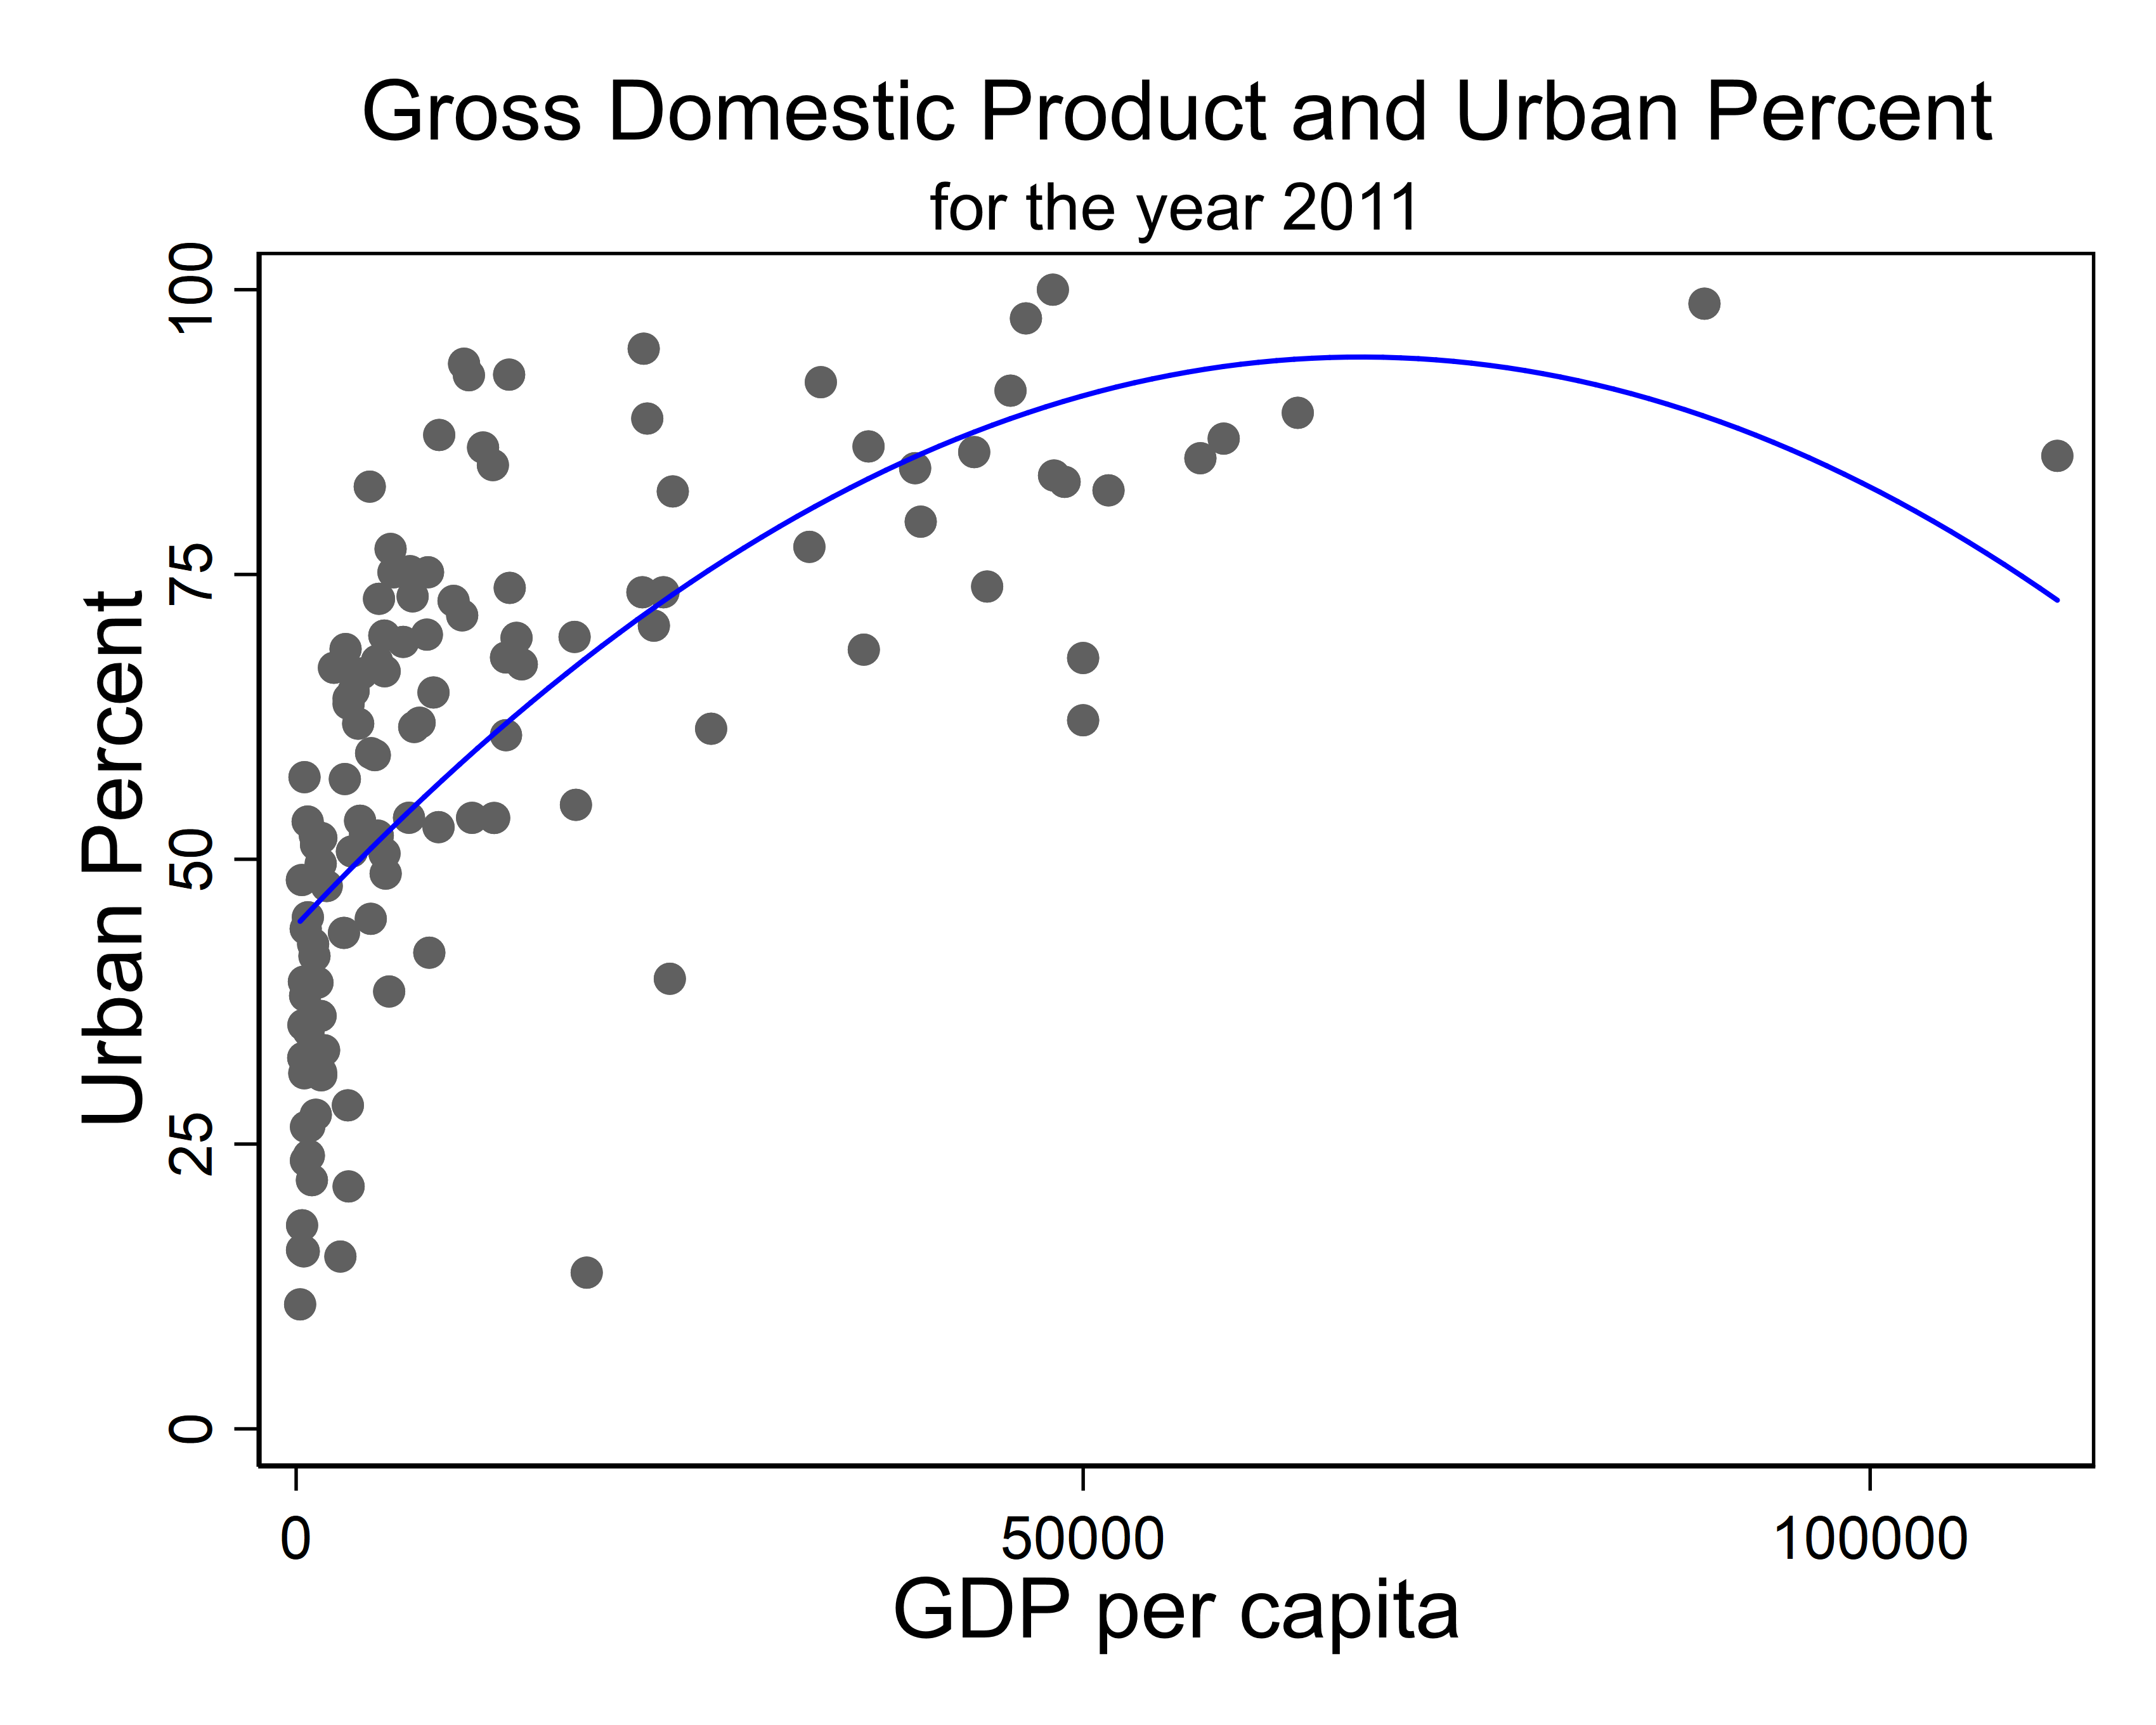

*In Stata, you can run a correlation matrix and you can run a test to see if the relationship is statistically significant. (pwcorr var1 var2, obs sig)

### Relationship between one categorical and one numeric variable
When examining relationships between categorical and numerical variables, we look for differences across the categories.
* Sometimes it helps to compare averages.

|  | white | Black | Asian | Latinx |
| --- | --- | --- | --- | --- |
| Median household income | 60,869 | 37,364 | 78,141 | 45,719 |

Note: Data from U.S. Census 2016

In Stata, to examine numeric statistics across a categorical variable, you can use difference of means test. (ttest numeric_var, by(cat_var))

# Interactions
The previous relationships we spoke about were between TWO variables. Typically, when we examine more than two variables, we use regression techniques. Interactions are terms we can use within regression modeling. It is a very powerful statistical tool.

<img src="https://printables.space/files/uploads/download-and-print/large-printable-numbers/plus-a4-1200x1697.jpg" width=100 height=100>

<center>$y_i=\beta_0+\beta_1*(variablea_i)+\beta_2*(variableb_i)+e_i$

Last week, we have talked about modeling and relationships. Typically, if we are modeling independent variables onto a dependent variable. 
* <b>Additive effects</b> are found when independent variables are left singular or without transformation. For example, we have a model where we have independent variables of gender, race, and age. The dependent variable is hourly wage. Here is what the model would look like:

<center>$(hourly wage)_{i} = \beta_{0} + \beta_{1}(gender_{i}) + \beta_{2}(race_{i}) + \beta_{3}(age_{i}) + e_{0i}$ 
    
where

$Y$ is dependent/outcome variable (hourly wgae), the variable you are interested in explaining

$i$ is the observation

$\beta_{0}$ is the intercept (or constant), usually the overall mean

$\beta_{1}$ is the coefficient estimate for gender
    
$\beta_{2}$ is the coefficient estimate for race
    
$\beta_{3}$ is the coefficient estimate for age
    
$e_{0i}$ is the error of the prediction or residual between the actual value and predicted value

<img src="https://www.shareicon.net/data/2016/03/02/727494_multiple_512x512.png" width=100 height=100>

<center>$y_i=\beta_0+\beta_1*(variablea_i)+\beta_2*(variableb_i)+\beta_3*(variablea_i X variableb_i)+e_i$

* <b>Interaction effects</b> (e.g., between variables a and b) to test whether variable <i>a</i> changes the effect that variable <i>b</i> has on the outcome. For example, we have a model where we have dependent variable hourly wage. The independent variables of gender, race, and age. We are interested to know how race effects the relationship of gender on hourly wage. We can evaluate this relationship by using an interaction term race*gender. The model would look like this:

<center>$(hourly wage)_{i} = \beta_{0} + \beta_{1}(gender_{i}) + \beta_{2}(race_{i}) + \beta_{3}(age_{i}) + \beta_{4}(gender*race_{i}) + e_{0i}$ 
    
where

$Y$ is dependent/outcome variable (hourly wgae), the variable you are interested in explaining

$i$ is the observation

$\beta_{0}$ is the intercept (or constant), usually the overall mean

$\beta_{1}$ is the coefficient estimate for gender
    
$\beta_{2}$ is the coefficient estimate for race
    
$\beta_{3}$ is the coefficient estimate for age
   
$\beta_{4}$ is the coefficient estimate of the interaction between gender and race
    
$e_{0i}$ is the error of the prediction or residual between the actual value and predicted value

<div class="alert alert-block alert-warning">
Remember, if you include an interaction term into the model---you must always have the additive and interaction terms included in the model. </div>

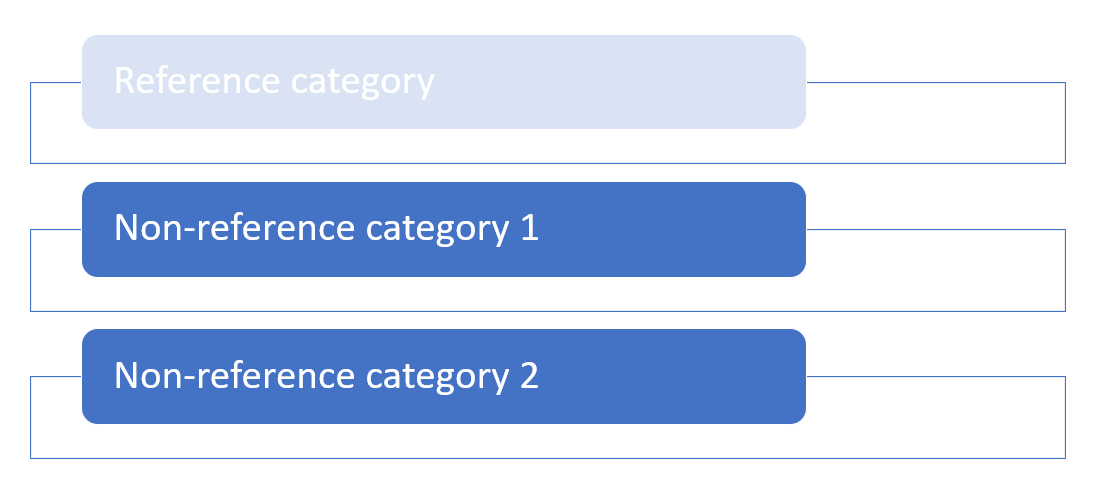

## Reference categories: <i>an important note about categorical variables</i>
Remember, that when using categorical variables in a regression model, you must set one of the categories in the categorical variable as the "reference category." All the beta estimates are referred back to that reference category.

In [50]:
*Make a week 3 folder in your SOC 206 folder
*Set-up working directory to your week 3 folder
cd "D:\documents copy\teaching\SOC 206 Spring 2024\Week3

D:\documents copy\teaching\SOC 206 Spring 2024\Week3


In [51]:
use "https://www.stata-press.com/data/r17/nhanes2.dta", clear
codebook hlthstat female




--------------------------------------------------------------------------------
hlthstat                                                           Health status
--------------------------------------------------------------------------------

                  type:  numeric (byte)
                 label:  hlth

                 range:  [1,8]                        units:  1
         unique values:  6                        missing .:  2/10,351

            tabulation:  Freq.   Numeric  Label
                         2,407         1  Excellent
                         2,591         2  Very good
                         2,938         3  Good
                         1,670         4  Fair
                           729         5  Poor
                            14         8  Blank but applicable
                             2         .  

--------------------------------------------------------------------------------
female                                                           

In [53]:
regress hlthstat female


      Source |       SS           df       MS      Number of obs   =    10,349
-------------+----------------------------------   F(1, 10347)     =     10.71
       Model |   15.966316         1   15.966316   Prob > F        =    0.0011
    Residual |  15428.8347    10,347  1.49114088   R-squared       =    0.0010
-------------+----------------------------------   Adj R-squared   =    0.0009
       Total |   15444.801    10,348  1.49253972   Root MSE        =    1.2211

------------------------------------------------------------------------------
    hlthstat |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
      female |   .0786557   .0240374     3.27   0.001     .0315378    .1257736
       _cons |   2.552187    .017418   146.53   0.000     2.518045     2.58633
------------------------------------------------------------------------------


Based on the regression results, here is our regression line:

<center>$(healthstat_i) = \beta_0 + \beta_1*(female_i)$

<center>$(healthstat_i) = 2.55 + .08*(female_i)$

* Female is a categorical variable where 0=man and 1=woman. 
* Coefficient for female is .08 meaning women have greater .08 points on "healthstat" variables COMPARED TO THE REFERENCE CATEGORY. The interpretation of "healthstat" is higher means poorer health. 
* The reference category here is man, so women have greater .08 points on "healthstat" variables COMPARED to men. So women report statistically significant lower health as compared to men. 
* One limitation of categorical variable, is you can only refer the estimate for the categorical variable back to the reference category.
* You get to choose what variable is the reference category.

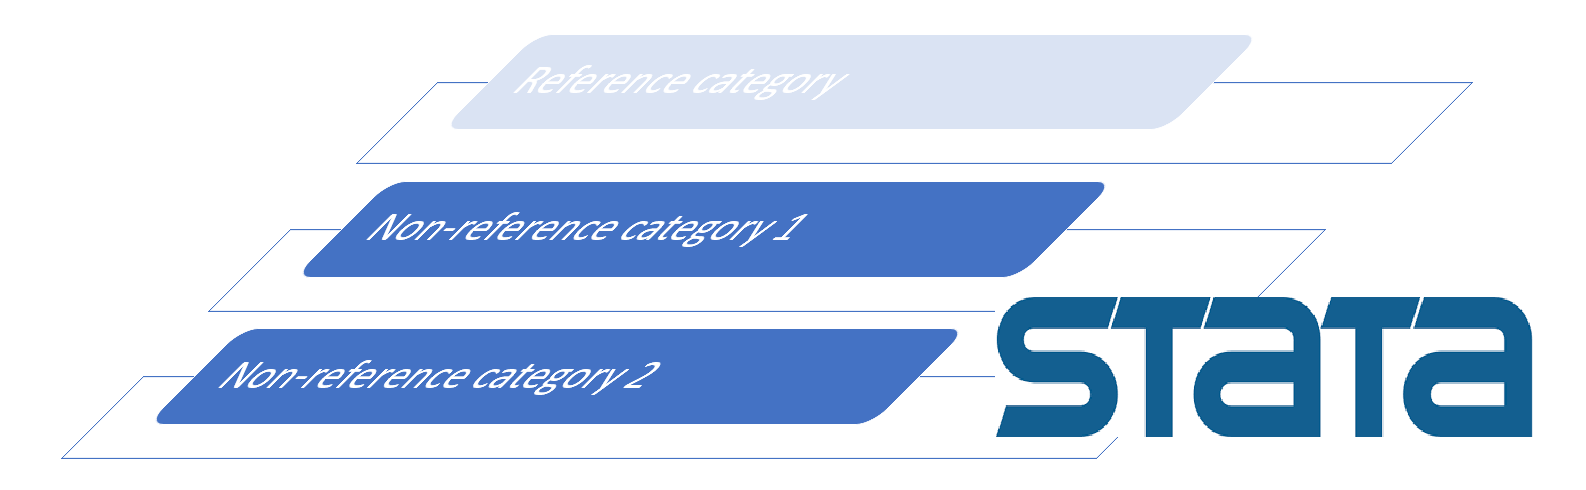

### Another important note about estimating categorical variables in Stata
Categorical variables must be in dummy variable format to run in Stata. Dummy variables are just variables represented by 0/1. So, let's say we have a region variable with the categories of northeast (1), mountain west (2), south (3), and west (4). 

| index | region |
| --- | --- | 
| 1 | 3 | 
| 2 | 2 |
| 3 | 2 | 
| 4 | 1 | 
| 5 | 1 | 
| 6 | 4 |
| 7 | 1 | 
| 8 | 3 | 

The region variable can be converted into four dummies variables:

| index | region | ne | mw | s | w |
| --- | --- | --- | --- | --- | --- |
| 1 | 3 | 0 | 0 | 1 | 0 |
| 2 | 2 | 0 | 1 | 0 | 0 |
| 3 | 2 | 0 | 1 | 0 | 0 |
| 4 | 1 | 1 | 0 | 0 | 0 |
| 5 | 1 | 1 | 0 | 0 | 0 |
| 6 | 4 | 0 | 0 | 0 | 1 |
| 7 | 1 | 1 | 0 | 0 | 0 |
| 8 | 3 | 0 | 0 | 1 | 0 |

Region is a categorical variable. ne, mw, s, and w are dummy variables. This is how to do it in Stata.

In [54]:
use "https://www.stata-press.com/data/r17/nhanes2.dta", clear
codebook region




--------------------------------------------------------------------------------
region                                                                    Region
--------------------------------------------------------------------------------

                  type:  numeric (byte)
                 label:  region

                 range:  [1,4]                        units:  1
         unique values:  4                        missing .:  0/10,351

            tabulation:  Freq.   Numeric  Label
                         2,096         1  NE
                         2,774         2  MW
                         2,853         3  S
                         2,628         4  W


In [55]:
*This command makes separate dummy variables for each categorical variable
tabulate region, gen(dum)
    rename dum1 region_ne
    rename dum2 region_mw
    rename dum3 region_s
    rename dum4 region_w



     Region |      Freq.     Percent        Cum.
------------+-----------------------------------
         NE |      2,096       20.25       20.25
         MW |      2,774       26.80       47.05
          S |      2,853       27.56       74.61
          W |      2,628       25.39      100.00
------------+-----------------------------------
      Total |     10,351      100.00






In [56]:
regress hlthstat region_mw region_s region_w


      Source |       SS           df       MS      Number of obs   =    10,349
-------------+----------------------------------   F(3, 10345)     =     49.43
       Model |  218.282048         3  72.7606825   Prob > F        =    0.0000
    Residual |   15226.519    10,345  1.47187231   R-squared       =    0.0141
-------------+----------------------------------   Adj R-squared   =    0.0138
       Total |   15444.801    10,348  1.49253972   Root MSE        =    1.2132

------------------------------------------------------------------------------
    hlthstat |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
   region_mw |   .0696536   .0351191     1.98   0.047     .0008134    .1384938
    region_s |    .380573   .0349066    10.90   0.000     .3121494    .4489966
    region_w |    .207626   .0355336     5.84   0.000     .1379732    .2772787
       _cons |   2.417184   .0265059    91.19   0.

### An easier way is to put a "i." in front of the categorical variable and Stata will automatically make the dummies to estimate the regression model

In [57]:
*Also, in Stata you want to use "i." to indicate categorical variable to Stata
regress hlthstat i.region


      Source |       SS           df       MS      Number of obs   =    10,349
-------------+----------------------------------   F(3, 10345)     =     49.43
       Model |  218.282048         3  72.7606825   Prob > F        =    0.0000
    Residual |   15226.519    10,345  1.47187231   R-squared       =    0.0141
-------------+----------------------------------   Adj R-squared   =    0.0138
       Total |   15444.801    10,348  1.49253972   Root MSE        =    1.2132

------------------------------------------------------------------------------
    hlthstat |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
      region |
         MW  |   .0696536   .0351191     1.98   0.047     .0008134    .1384938
          S  |    .380573   .0349066    10.90   0.000     .3121494    .4489966
          W  |    .207626   .0355336     5.84   0.000     .1379732    .2772787
             |
       _cons |   2.4

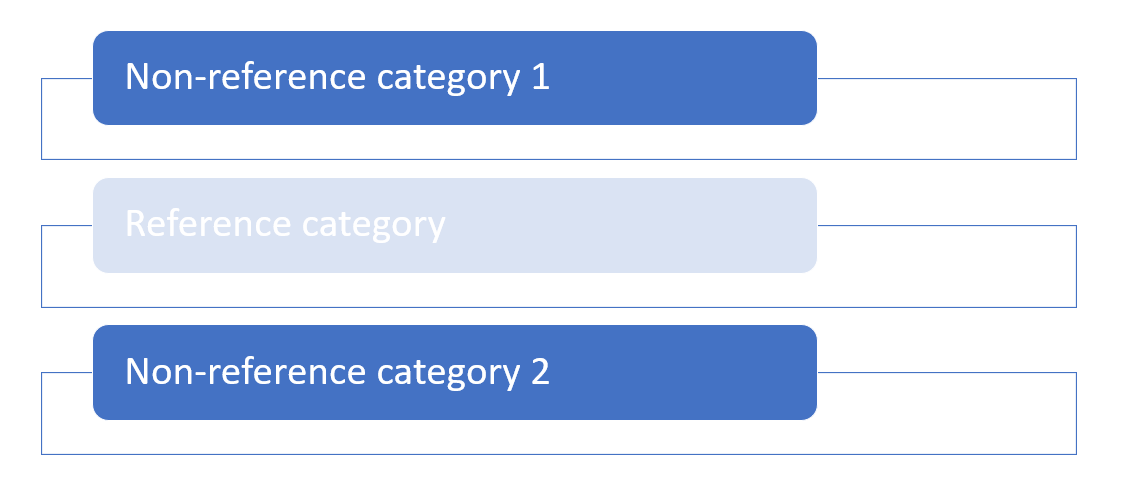

## Specifiying particular category as a reference category in Stata
Let's say, we have a categorical variable with mutiple categories. You can choose which ever category to be the reference. Here is how you can specify to Stata the specific reference category.

In [58]:
use "https://www.stata-press.com/data/r17/nhanes2.dta", clear
*This command gives you a all the numeric values of the categories.
*You are going to need to know the specific numeric value of the category.
codebook region




--------------------------------------------------------------------------------
region                                                                    Region
--------------------------------------------------------------------------------

                  type:  numeric (byte)
                 label:  region

                 range:  [1,4]                        units:  1
         unique values:  4                        missing .:  0/10,351

            tabulation:  Freq.   Numeric  Label
                         2,096         1  NE
                         2,774         2  MW
                         2,853         3  S
                         2,628         4  W


Let's say, we want South region to be the reference category. South is region==3

In [59]:
regress hlthstat ib3.region


      Source |       SS           df       MS      Number of obs   =    10,349
-------------+----------------------------------   F(3, 10345)     =     49.43
       Model |  218.282048         3  72.7606825   Prob > F        =    0.0000
    Residual |   15226.519    10,345  1.47187231   R-squared       =    0.0141
-------------+----------------------------------   Adj R-squared   =    0.0138
       Total |   15444.801    10,348  1.49253972   Root MSE        =    1.2132

------------------------------------------------------------------------------
    hlthstat |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
      region |
         NE  |   -.380573   .0349066   -10.90   0.000    -.4489966   -.3121494
         MW  |  -.3109194   .0323526    -9.61   0.000    -.3743367    -.247502
          W  |   -.172947   .0328021    -5.27   0.000    -.2372454   -.1086486
             |
       _cons |   2.7

"Heathstat" is lower in northeast, mountainwest, and west regions as compared to the south region. 

In [60]:
regress hlthstat ib4.region


      Source |       SS           df       MS      Number of obs   =    10,349
-------------+----------------------------------   F(3, 10345)     =     49.43
       Model |  218.282048         3  72.7606825   Prob > F        =    0.0000
    Residual |   15226.519    10,345  1.47187231   R-squared       =    0.0141
-------------+----------------------------------   Adj R-squared   =    0.0138
       Total |   15444.801    10,348  1.49253972   Root MSE        =    1.2132

------------------------------------------------------------------------------
    hlthstat |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
      region |
         NE  |   -.207626   .0355336    -5.84   0.000    -.2772787   -.1379732
         MW  |  -.1379724   .0330282    -4.18   0.000     -.202714   -.0732308
          S  |    .172947   .0328021     5.27   0.000     .1086486    .2372454
             |
       _cons |    2.

"Heathstat" is lower in northeast and mountainwest regions as compared to the west region. "Heathstat" is greater in south region as compared to the west region. 

<img src="https://mathinsight.org/media/applet/image/large/cartesian_coordinate_axes_3d.png" width=300 height=300>

## Generally, we have three types of interactions. 
* Interaction term between two categorical variables
* Interaction term between one categorical variable and one numeric variable.
* Interaction term between two numeric variables

We will go over how to evaluate interactions in regression models in Stata.

## Interaction term between two categorical variables

So, we are interested in the understanding the role of age, gender, and region onto body mass index (bmi). Age and bmi are numeric variables. Gender and region are categorical variables.

<b>Additive model</b>

<center>$(bmi_i)=\beta_0+\beta_1*(age_i)+\beta_2*(female_i)+\beta_3*(MW_i)++\beta_4*(S_i)+\beta_5*(W_i)$

Then, we say for some hypothetical reason, we think the effect of gender on bmi changes based on region. We can evaluate this by using interaction terms.

<b>Interaction model</b>

<center>$(bmi_i)=\beta_0+\beta_1*(age_i)+\beta_2*(female_i)+\beta_3*(MW_i)+\beta_4*(S_i)+\beta_5*(W_i)+\beta_6*(female_ixMW_i)+\beta_7*(female_ixS_i)+\beta_8*(female_ixW_i)$ </center>
    
* Notheast is the reference category

In [61]:
use "https://www.stata-press.com/data/r17/nhanes2.dta", clear
desc




Contains data from https://www.stata-press.com/data/r17/nhanes2.dta
  obs:        10,351                          
 vars:            58                          20 Dec 2020 10:07
 size:     1,107,557                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
sampl           long    %9.0g                 Unique case identifier
strata          byte    %9.0g                 Stratum identifier
psu             byte    %9.0g      psulbl     Primary sampling unit
region          byte    %9.0g      region     Region
smsa            byte    %22.0g     smsalbl    SMSA type
location        byte    %9.0g                 Location (stand office ID)
houssiz         byte    %9.0g                 Number of people in household
sex             byte    %9.0g      sex        S

In [62]:
*Additive model
regress bmi age i.female i.region


      Source |       SS           df       MS      Number of obs   =    10,351
-------------+----------------------------------   F(5, 10345)     =     63.02
       Model |  7390.19781         5  1478.03956   Prob > F        =    0.0000
    Residual |  242633.964    10,345  23.4542256   R-squared       =    0.0296
-------------+----------------------------------   Adj R-squared   =    0.0291
       Total |  250024.162    10,350  24.1569239   Root MSE        =     4.843

------------------------------------------------------------------------------
         bmi |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         age |   .0488851   .0027674    17.66   0.000     .0434605    .0543097
             |
      female |
     Female  |   .0372717   .0953357     0.39   0.696    -.1496047    .2241481
             |
      region |
         MW  |   .0064779   .1402121     0.05   0.963     -.268365   

<b>In Stata, you can do the following: </b>
* Use the "##" notation between the two variables you want the interaction term. Using the "##" includes the additive and interaction terms. For example i.female##i.region
* Use the "#" notation between the two variables you want the interaction term. Using the "#" includes only the interaction term. For example i.female#i.region

In [63]:
*Interaction model
*Notice how I don't include the additive terms.
*this is equal to regress bmi age i.female i.region female#region
regress bmi age female##region


      Source |       SS           df       MS      Number of obs   =    10,351
-------------+----------------------------------   F(8, 10342)     =     40.30
       Model |  7559.19099         8  944.898874   Prob > F        =    0.0000
    Residual |  242464.971    10,342  23.4446888   R-squared       =    0.0302
-------------+----------------------------------   Adj R-squared   =    0.0295
       Total |  250024.162    10,350  24.1569239   Root MSE        =     4.842

-------------------------------------------------------------------------------
          bmi |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
          age |   .0488087   .0027671    17.64   0.000     .0433846    .0542328
              |
       female |
      Female  |  -.2939562   .2116093    -1.39   0.165    -.7087514    .1208389
              |
       region |
          MW  |  -.1420836   .2023593    -0.70   0.483     -

<b>We can make an estimated linear equation for each combination of female and region</b>

<center>$(bmi_i)=\beta_0+\beta_1*(age_i)+\beta_2*(female_i)+\beta_3*(MW_i)+\beta_4*(S_i)+\beta_5*(W_i)+\beta_6*(female_ixMW_i)+\beta_7*(female_ixS_i)+\beta_8*(female_ixW_i)$

<center>$(bmi_i)=23.39+.05*(age_i)+(-.29)*(female_i)+(-.14)*(MW_i)+(-.33)*(S_i)+(-.27)*(W_i)+.29*(female_ixMW_i)+.71*(female_ixS_i)+.23*(female_ixW_i)$

<b>female=0, northeast=1, mountain west=0, south=0, west=0</b>
<center>$(bmi_i)=23.39+.05*(age_i)+(-.29)*(0)+(-.14)*(0)+(-.33)*(0)+(-.27)*(0)+.29*(0x0)+.71*(0x0)+.23*(0x0)$
    
<center>$(bmi_i) = 23.39 + .05*(age_i)$

<b>female=0, northeast=0, mountain west=1, south=0, west=0</b>
<center>$(bmi_i)=23.39+.05*(age_i)+(-.29)*(0)+(-.14)*(1)+(-.33)*(0)+(-.27)*(0)+.29*(0x1)+.71*(0x0)+.23*(0x0)$
    
<center>$(bmi_i) = 23.25 + .05*(age_i)$

<b>female=0, northeast=0, mountain west=0, south=1, west=0</b>
<center>$(bmi_i)=23.39+.05*(age_i)+(-.29)*(0)+(-.14)*(0)+(-.33)*(1)+(-.27)*(0)+.29*(0x0)+.71*(0x1)+.23*(0x0)$
    
<center>$(bmi_i) = 23.06 + .05*(age_i)$

<b>female=0, northeast=0, mountain west=0, south=0, west=1</b>
<center>$(bmi_i)=23.39+.05*(age_i)+(-.29)*(0)+(-.14)*(0)+(-.33)*(0)+(-.27)*(1)+.29*(0x0)+.71*(0x0)+.23*(0x1)$
    
<center>$(bmi_i) = 22.79 + .05*(age_i)$

<b>female=1, northeast=1, mountain west=0, south=0, west=0</b>
<center>$(bmi_i)=23.39+.05*(age_i)+(-.29)*(1)+(-.14)*(0)+(-.33)*(0)+(-.27)*(0)+.29*(1x0)+.71*(1x0)+.23*(1x0)$
    
<center>$(bmi_i) = (23.39-.29)+ .05*(age_i)$
    
<center>$(bmi_i) = 23.1+ .05*(age_i)$

<b>female=1, northeast=0, mountain west=1, south=0, west=0</b>
<center>$(bmi_i)=23.39+.05*(age_i)+(-.29)*(1)+(-.14)*(1)+(-.33)*(0)+(-.27)*(0)+.29*(1x1)+.71*(1x0)+.23*(1x0)$
    
<center>$(bmi_i) = (23.39-.29-.14+.29) + .05*(age_i)$
    
<center>$(bmi_i) = 23.25 + .05*(age_i)$

<b>female=1, northeast=0, mountain west=0, south=1, west=0</b>
<center>$(bmi_i)=23.39+.05*(age_i)+(-.29)*(1)+(-.14)*(0)+(-.33)*(1)+(-.27)*(0)+.29*(1x0)+.71*(1x1)+.23*(1x0)$
    
<center>$(bmi_i) = (23.39-.29-.33+.71) + .05*(age_i)$
    
<center>$(bmi_i) = 23.48 + .05*(age_i)$

<b>female=1, northeast=0, mountain west=0, south=0, west=1</b>
<center>$(bmi_i)=23.39+.05*(age_i)+(-.29)*(1)+(-.14)*(0)+(-.33)*(0)+(-.27)*(1)+.29*(1x0)+.71*(1x0)+.23*(1x1)$
    
<center>$(bmi_i) = (23.39-.29-.27+.23) + .05*(age_i)$
    
<center>$(bmi_i) = (23.06) + .05*(age_i)$

<i>You can estimate bmi by pulling in age values. For example, the average age.</i>

In [64]:
summarize age


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         age |     10,351    47.57965    17.21483         20         74


<b> age=47.58, female=1, northeast=0, mountain west=1, south=0, west=0</b>
<center>$(bmi_i) = (23.25) + .05*(age_i) $

<center>$(bmi_i) = (23.25) + .05*(47.58) $
    
<center>$(bmi_i) = 25.63$

<b> age=47.58, female=1, northeast=0, mountain west=0, south=1, west=0</b>
<center>$(bmi_i) = 23.48 + .05*(age_i)$

<center>$(bmi_i) = 23.48 + .05*(47.58)$
    
<center>$(bmi_i) = 25.86$

In [65]:
*quietly command runs the command without posting the outprint
quietly regress bmi age female##region
*this post estimation command tells you how to call which variables
regress, coeflegend




      Source |       SS           df       MS      Number of obs   =    10,351
-------------+----------------------------------   F(8, 10342)     =     40.30
       Model |  7559.19099         8  944.898874   Prob > F        =    0.0000
    Residual |  242464.971    10,342  23.4446888   R-squared       =    0.0302
-------------+----------------------------------   Adj R-squared   =    0.0295
       Total |  250024.162    10,350  24.1569239   Root MSE        =     4.842

-------------------------------------------------------------------------------
          bmi |      Coef.  Legend
--------------+----------------------------------------------------------------
          age |   .0488087  _b[age]
              |
       female |
      Female  |  -.2939562  _b[1.female]
              |
       region |
          MW  |  -.1420836  _b[2.region]
           S  |  -.3347762  _b[3.region]
           W  |  -.2694841  _b[4.region]
              |
female#region |
   Female#MW  |   .2897474  _b[

### Margins command in Stata
The margins command is a easy way to graph these results in Stata. It is a postestimation command, so you have to regress first.

In [66]:
*The margins command helps calculate estiamtes for interactions
margins region#female, at(age=47.57965)


Adjusted predictions                            Number of obs     =     10,351
Model VCE    : OLS

Expression   : Linear prediction, predict()
at           : age             =    47.57965

-------------------------------------------------------------------------------
              |            Delta-method
              |     Margin   Std. Err.      t    P>|t|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
region#female |
     NE#Male  |   25.71501   .1517587   169.45   0.000     25.41753    26.01248
   NE#Female  |   25.42105   .1474742   172.38   0.000     25.13197    25.71013
     MW#Male  |   25.57292   .1338383   191.07   0.000     25.31058    25.83527
   MW#Female  |   25.56872   .1265618   202.03   0.000     25.32063     25.8168
      S#Male  |   25.38023   .1326702   191.30   0.000     25.12017    25.64029
    S#Female  |   25.79874   .1241829   207.75   0.000     25.55532    26.04216
      W#Male  |   25.44552   .1366

In [67]:
*female=0, all region variables=0 and age=47.57965
*this matches NE#Male
di _b[_cons]+(_b[age])*47.57965

25.715008




  Variables that uniquely identify margins: region female


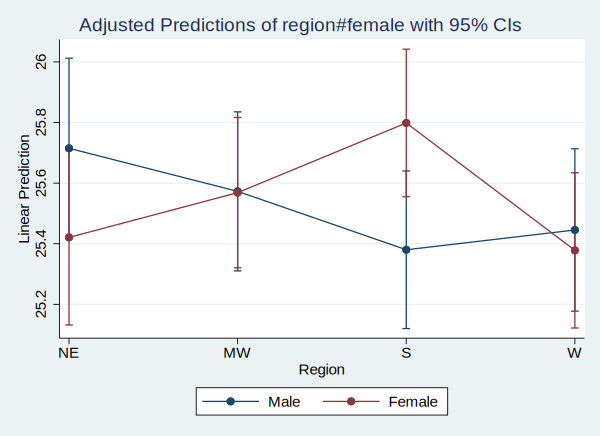




  Variables that uniquely identify margins: region female


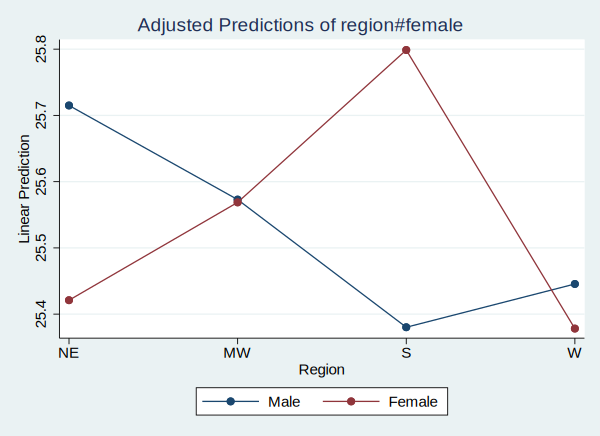



(file marginsplot_bmi_female_region.png written in PNG format)


In [69]:
marginsplot
* adding noci removes the confidence intervals
marginsplot, noci
graph export "marginsplot_bmi_female_region.png", replace width(3400)

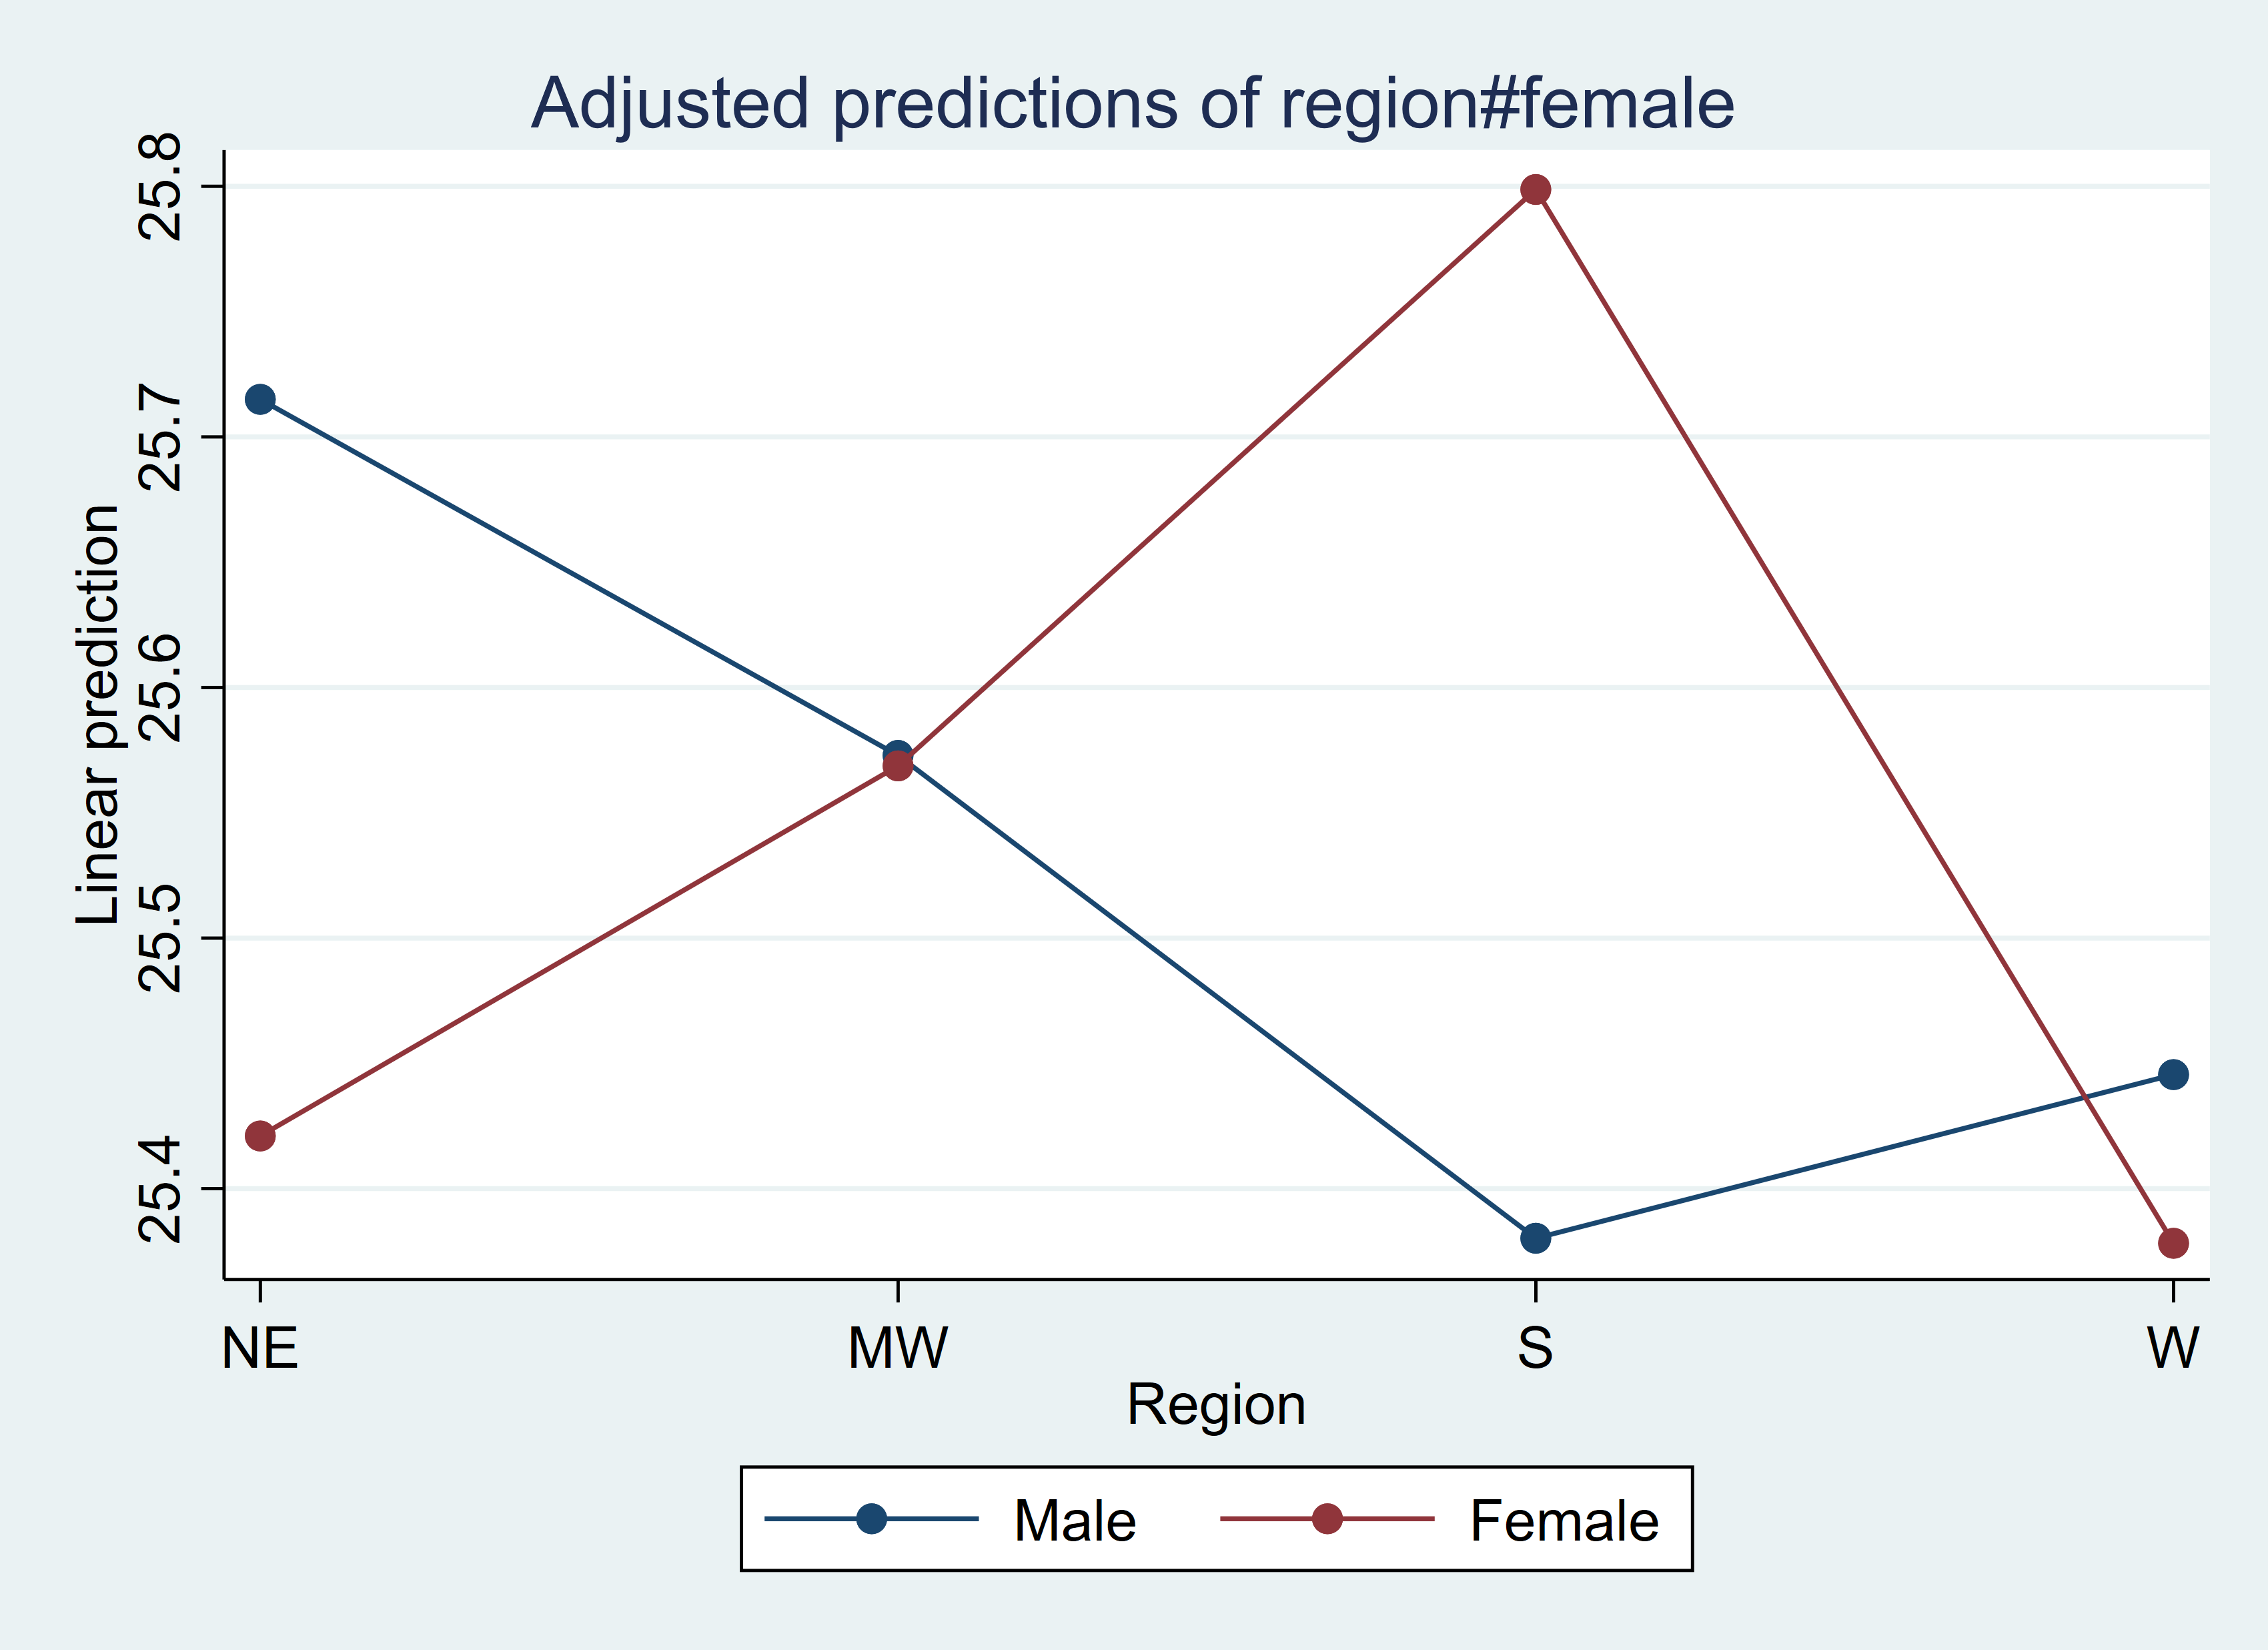

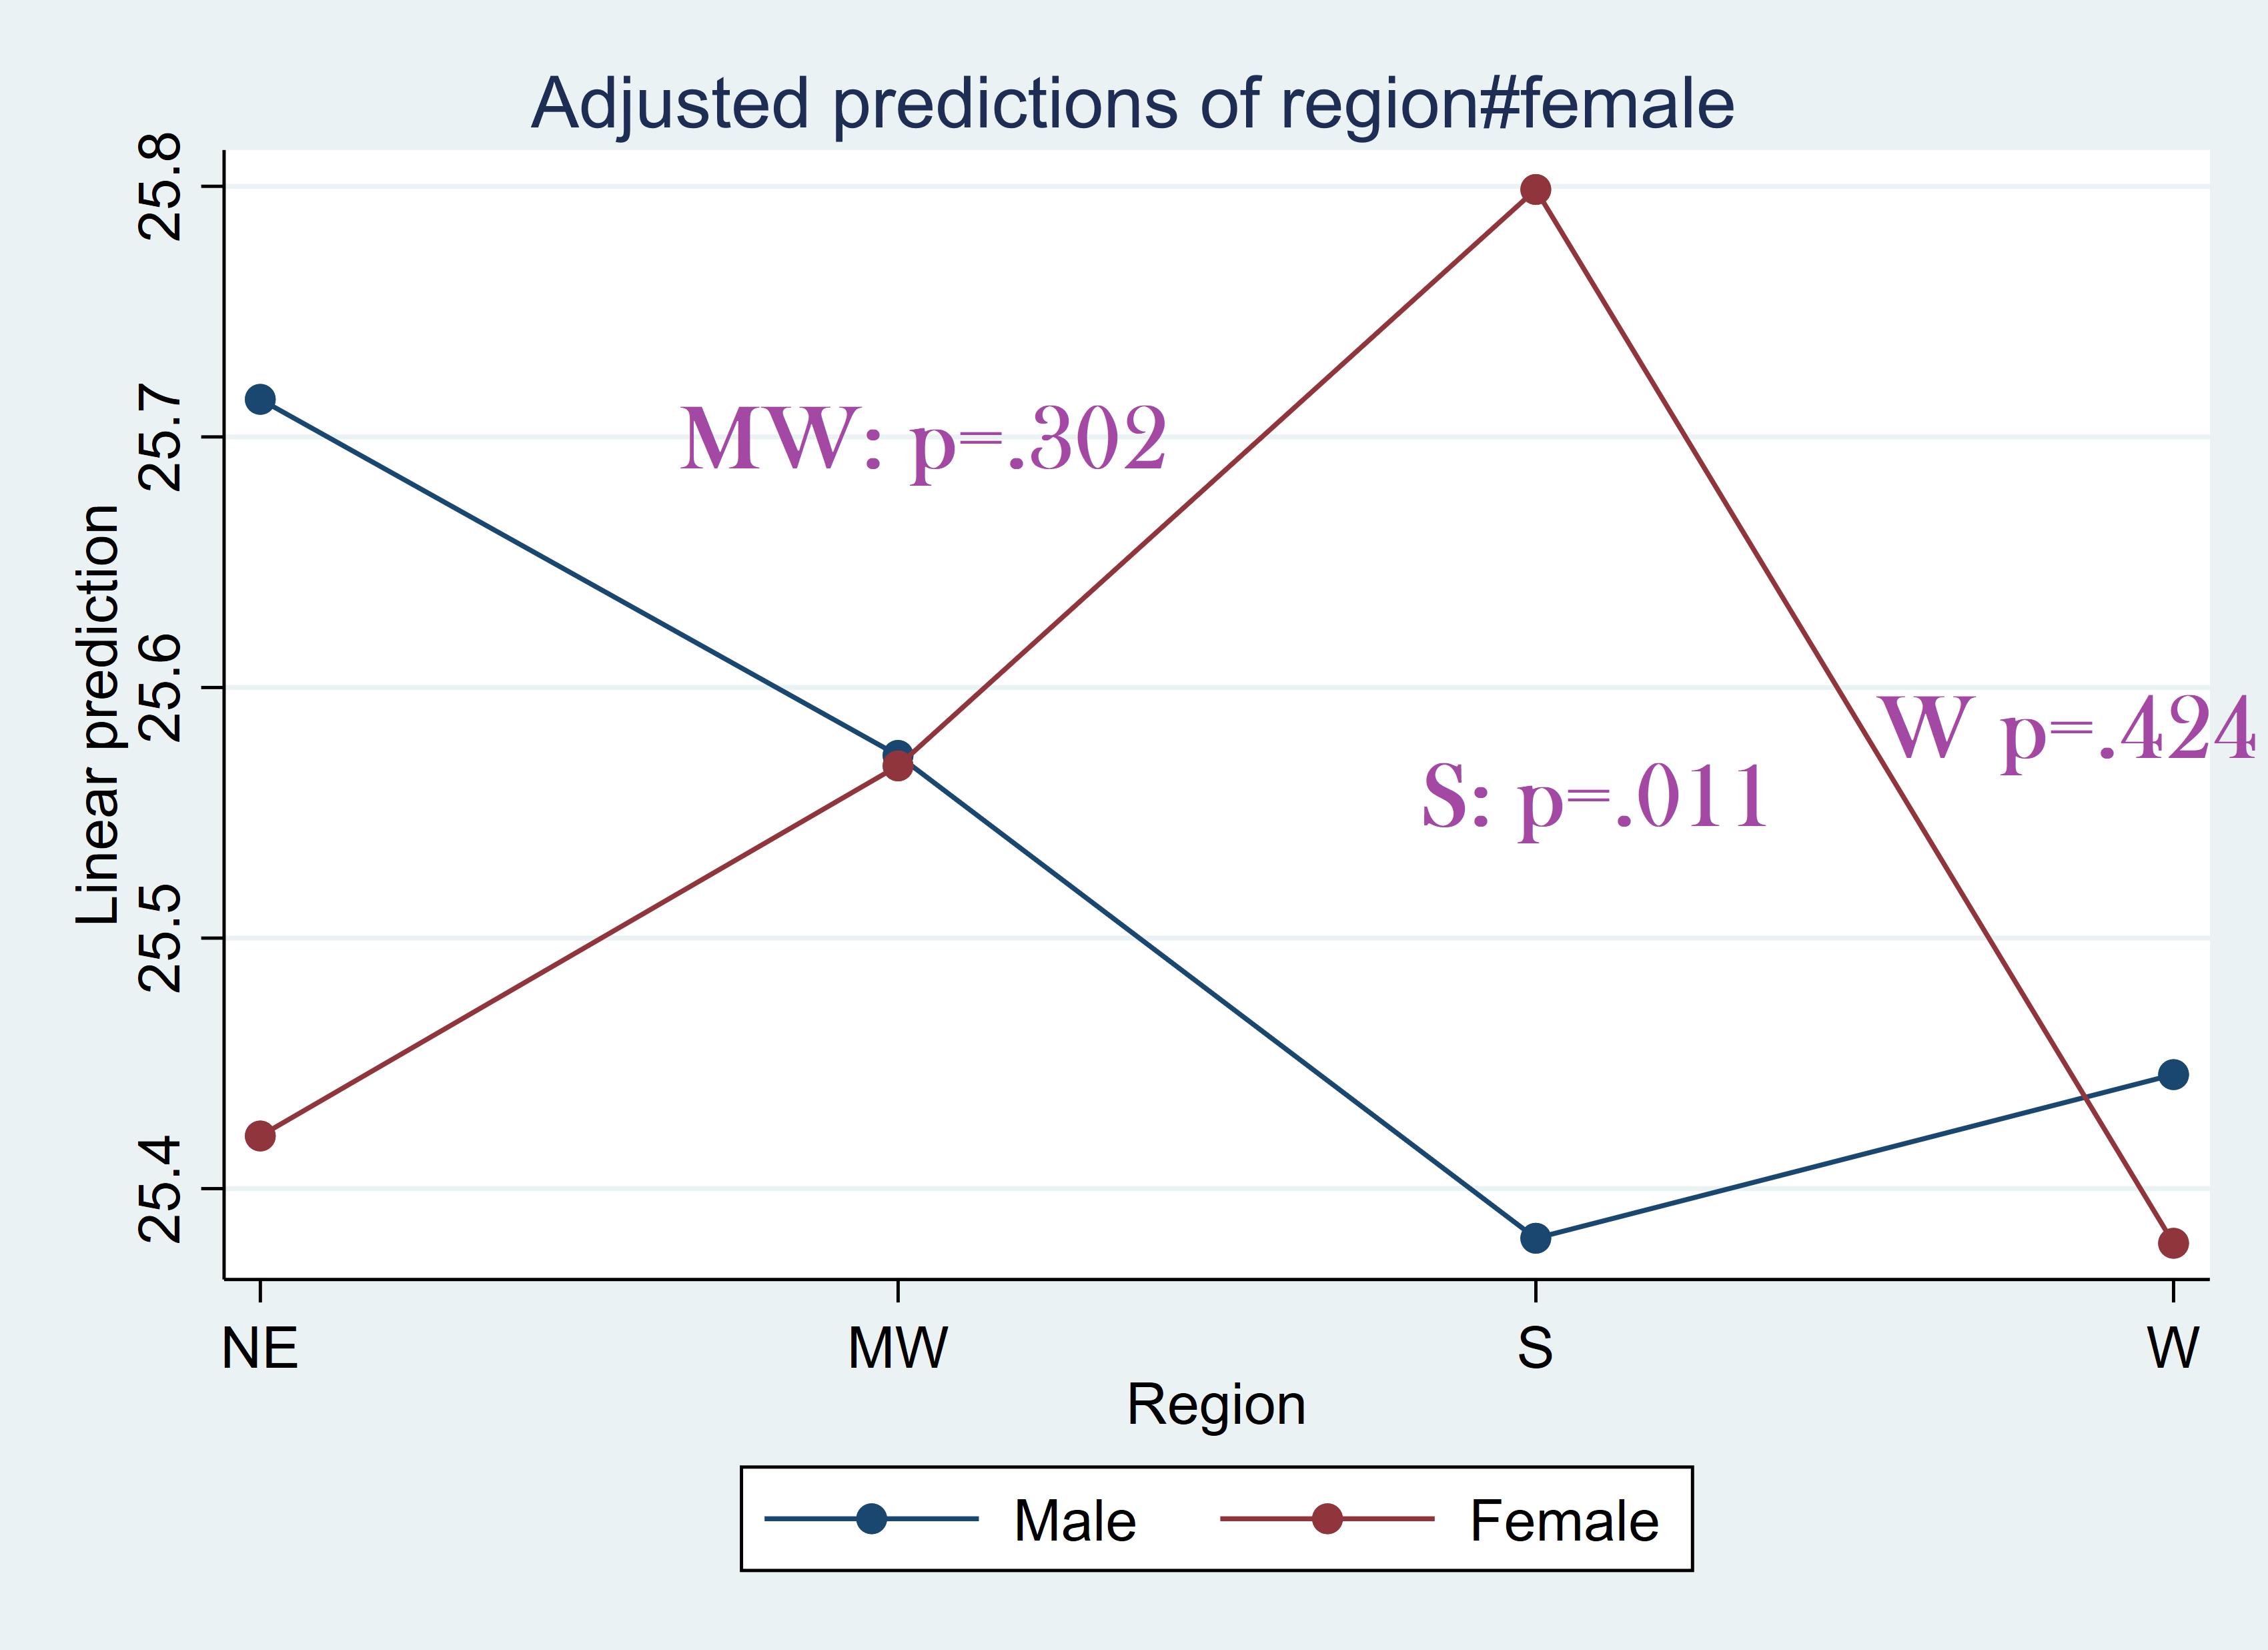

While holding age constant at its mean, we see important the effect of gender on bmi differents based on regions. We can examine which interaction terms are statistically significant to which relatonships are stronger by going back to the regression output. The effect of south region is statistically significant. The effect of gender on bmi is strongest for the south region as compared to northeast.

# Practice
## Interactions between two categorical variables.
* Have do and log files of your practice work.
* Q1: Open the NHANES2 data (https://www.stata-press.com/data/r17/nhanes2.dta). Use the "codebook" command to find out the categories of rural and female.
* Q2: Run a regression with body mass index (bmi) as the outcome variables and with the following independent variables: rural, female, and age. 
* Q3: Run a regression with body mass index (bmi) as the outcome variables and with the following independent variables: rural, female, age, and an interaction between rural and female. 
* Q4: What is the average age?
* Q5: Use the margins command to make a graph comparing the interactions. Make sure to use the average of age as the control. Plot the margins results.
* Q6: Write a sentence summarizing the results of the interaction.

## Interaction term between one categorical variable and one numeric variable

Let's say, we want to fit a model predicting income across independent variables educational attainment and gender. Here income and educational attainment are numeric variables. Educational attainment is measured in the number of years of school. Gender is a categorical variable.

<b>Additive model</b> 

<center>$(income_i)=\beta_0+\beta_1*(educ_i)+\beta_2*(male_i)$

Here we are interested in whether the effect of educational attainment on income differs between gender.

<b>Interaction model</b>

<center>$income_i = \beta_0 + \beta_1*(educ_i) + \beta_2*(male_i) + \beta_3*(educ_i * male_i)$

In [70]:
*First let's open our data set.
use "http://www.stata-press.com/data/agis6/c10interaction", clear
desc




Contains data from http://www.stata-press.com/data/agis6/c10interaction.dta
  obs:           120                          
 vars:             4                          9 Feb 2016 12:06
 size:           600                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
inc             int     %8.0g                 Income in 1000s
educ            byte    %8.0g                 Years of education
male            byte    %8.0g                 females are 1 and males are 0
alienation      byte    %8.0g                 Alienation 0 to 10
--------------------------------------------------------------------------------
Sorted by: male


In [89]:
*Estimate the additive model
regress inc educ i.male


      Source |       SS           df       MS      Number of obs   =       120
-------------+----------------------------------   F(2, 117)       =     37.19
       Model |  100464.105         2  50232.0527   Prob > F        =    0.0000
    Residual |  158015.895       117   1350.5632   R-squared       =    0.3887
-------------+----------------------------------   Adj R-squared   =    0.3782
       Total |      258480       119  2172.10084   Root MSE        =     36.75

------------------------------------------------------------------------------
         inc |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        educ |   8.045694   1.008586     7.98   0.000     6.048243    10.04315
      1.male |   19.04991   6.719787     2.83   0.005     5.741726     32.3581
       _cons |  -42.54411    14.2919    -2.98   0.004    -70.84847   -14.23975
--------------------------------------------------

<b>Additive model</b>
<center>$(income_i)=-42.54+8.05*(educ_i)+19.05*(male_i)$
    
In an additive model, the categorical variable has a "fixed slope" so each catgeory has its "own intercept"/starting point and the slopes remain.

<b> male==0</b>

<center>$(income_i)=-42.54+8.05*(educ_i)+19.05*(0)$
<center> Female equation of income:    
    <center>$(income_i)=-42.54+8.05*(educ_i)$

<b>male==1</b>
Male equation of income

<center>$(income_i)=-42.54+8.05*(educ_i)+19.05*(1)$
<center>Male equation of income
<center>$(income_i)=-23.49+8.05*(educ_i)$

<b>Compare the two equations...explain the similarities and differences

Now, we already see a difference in gender. But let's see if gender changes the effect <i>educational attainment</i> has on income.

<b>Interaction model</b>

<center>$income_i = \beta_0 + \beta_1*(educ_i) + \beta_2*(male_i) + \beta_3*(educ_i * male_i)$

In [92]:
*You can use the # between variables
regress inc c.educ##i.male


      Source |       SS           df       MS      Number of obs   =       120
-------------+----------------------------------   F(3, 116)       =     34.89
       Model |  122604.719         3  40868.2397   Prob > F        =    0.0000
    Residual |  135875.281       116  1171.33863   R-squared       =    0.4743
-------------+----------------------------------   Adj R-squared   =    0.4607
       Total |      258480       119  2172.10084   Root MSE        =    34.225

------------------------------------------------------------------------------
         inc |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        educ |   3.602369   1.388076     2.60   0.011     .8531092    6.351628
      1.male |  -91.88539   26.27242    -3.50   0.001    -143.9212   -39.84954
             |
 male#c.educ |
          1  |   8.196446   1.885263     4.35   0.000     4.462445    11.93045
             |
     

It is hard to interpret this value, so it is helpful to make equation for both male and female.

<center>$income_i = \beta_0 + \beta_1*(educ_i) + \beta_2*(male_i) + \beta_3*(educ_i * male_i)$

First, let's make the equation line for female so male=0.


<center>$income_i = 16.85 + 3.60*(educ_i) + (-91.86)*(0) + 8.20*(educ_i * 0)$
    
<center>$income_i = 16.85 + 3.60*(educ_i)$

Second, let's make the equation for male so male=1

<center>$income_i = 16.85 + 3.60*(educ_i) + (-91.86)*(1) + 8.20*(educ_i * 1)$
    
<center>$income_i = (16.85 -91.86) + (3.60 + 8.20)*(educ_i)$
    
<center>$income_i = -75.01 + 11.80*(educ_i)$

Now, we can compare the slopes for $(educ_i)$ between men and women. For women, the slope between educational years and income is 3.60. This means for each additional year of education there is a \\$3,600 increase in income. For men, the slope between educational years and income is 11.80. This means for each additional year of education there is a \\$11,800 increase in income. Stark difference!

In [93]:
sum edu


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
        educ |        120       13.55    3.345259          8         18


In [94]:
quietly regress inc c.educ##i.male
*When using the margins command, if there are numeric variables, you need to specify the values.
margins male , at (educ=(8(2)18))




Adjusted predictions                            Number of obs     =        120
Model VCE    : OLS

Expression   : Linear prediction, predict()

1._at        : educ            =           8

2._at        : educ            =          10

3._at        : educ            =          12

4._at        : educ            =          14

5._at        : educ            =          16

6._at        : educ            =          18

------------------------------------------------------------------------------
             |            Delta-method
             |     Margin   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    _at#male |
        1 0  |   45.66729    8.66112     5.27   0.000     28.51285    62.82173
        1 1  |   19.35346   8.545103     2.26   0.025      2.42881    36.27812
        2 0  |   52.87203   6.431252     8.22   0.000     40.13412    65.60993
        2 1  |   42.95109   6.496577     6.61   0

<b>educ=8 and male =0</b>

<center>$income_i = 16.85 + 3.60*(8)$
    
<center>$income_i = 16.85 +28.8$
    
<center>$income_i = 45.65$

<b>educ=8 and male =1</b>

<center>$income_i = -75.01 + 11.80*(8)$

<center>$income_i = -75.01 + 94.4$
    
<center>$income_i = 19.39$

Stata will even make graphs based on margins estimates.



  Variables that uniquely identify margins: educ male


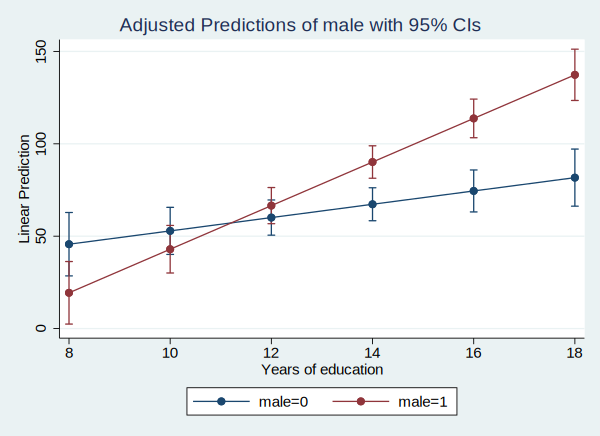



(file marginsplot_educ_male.png written in PNG format)


In [95]:
marginsplot
graph export "marginsplot_educ_male.png", replace width(3400)

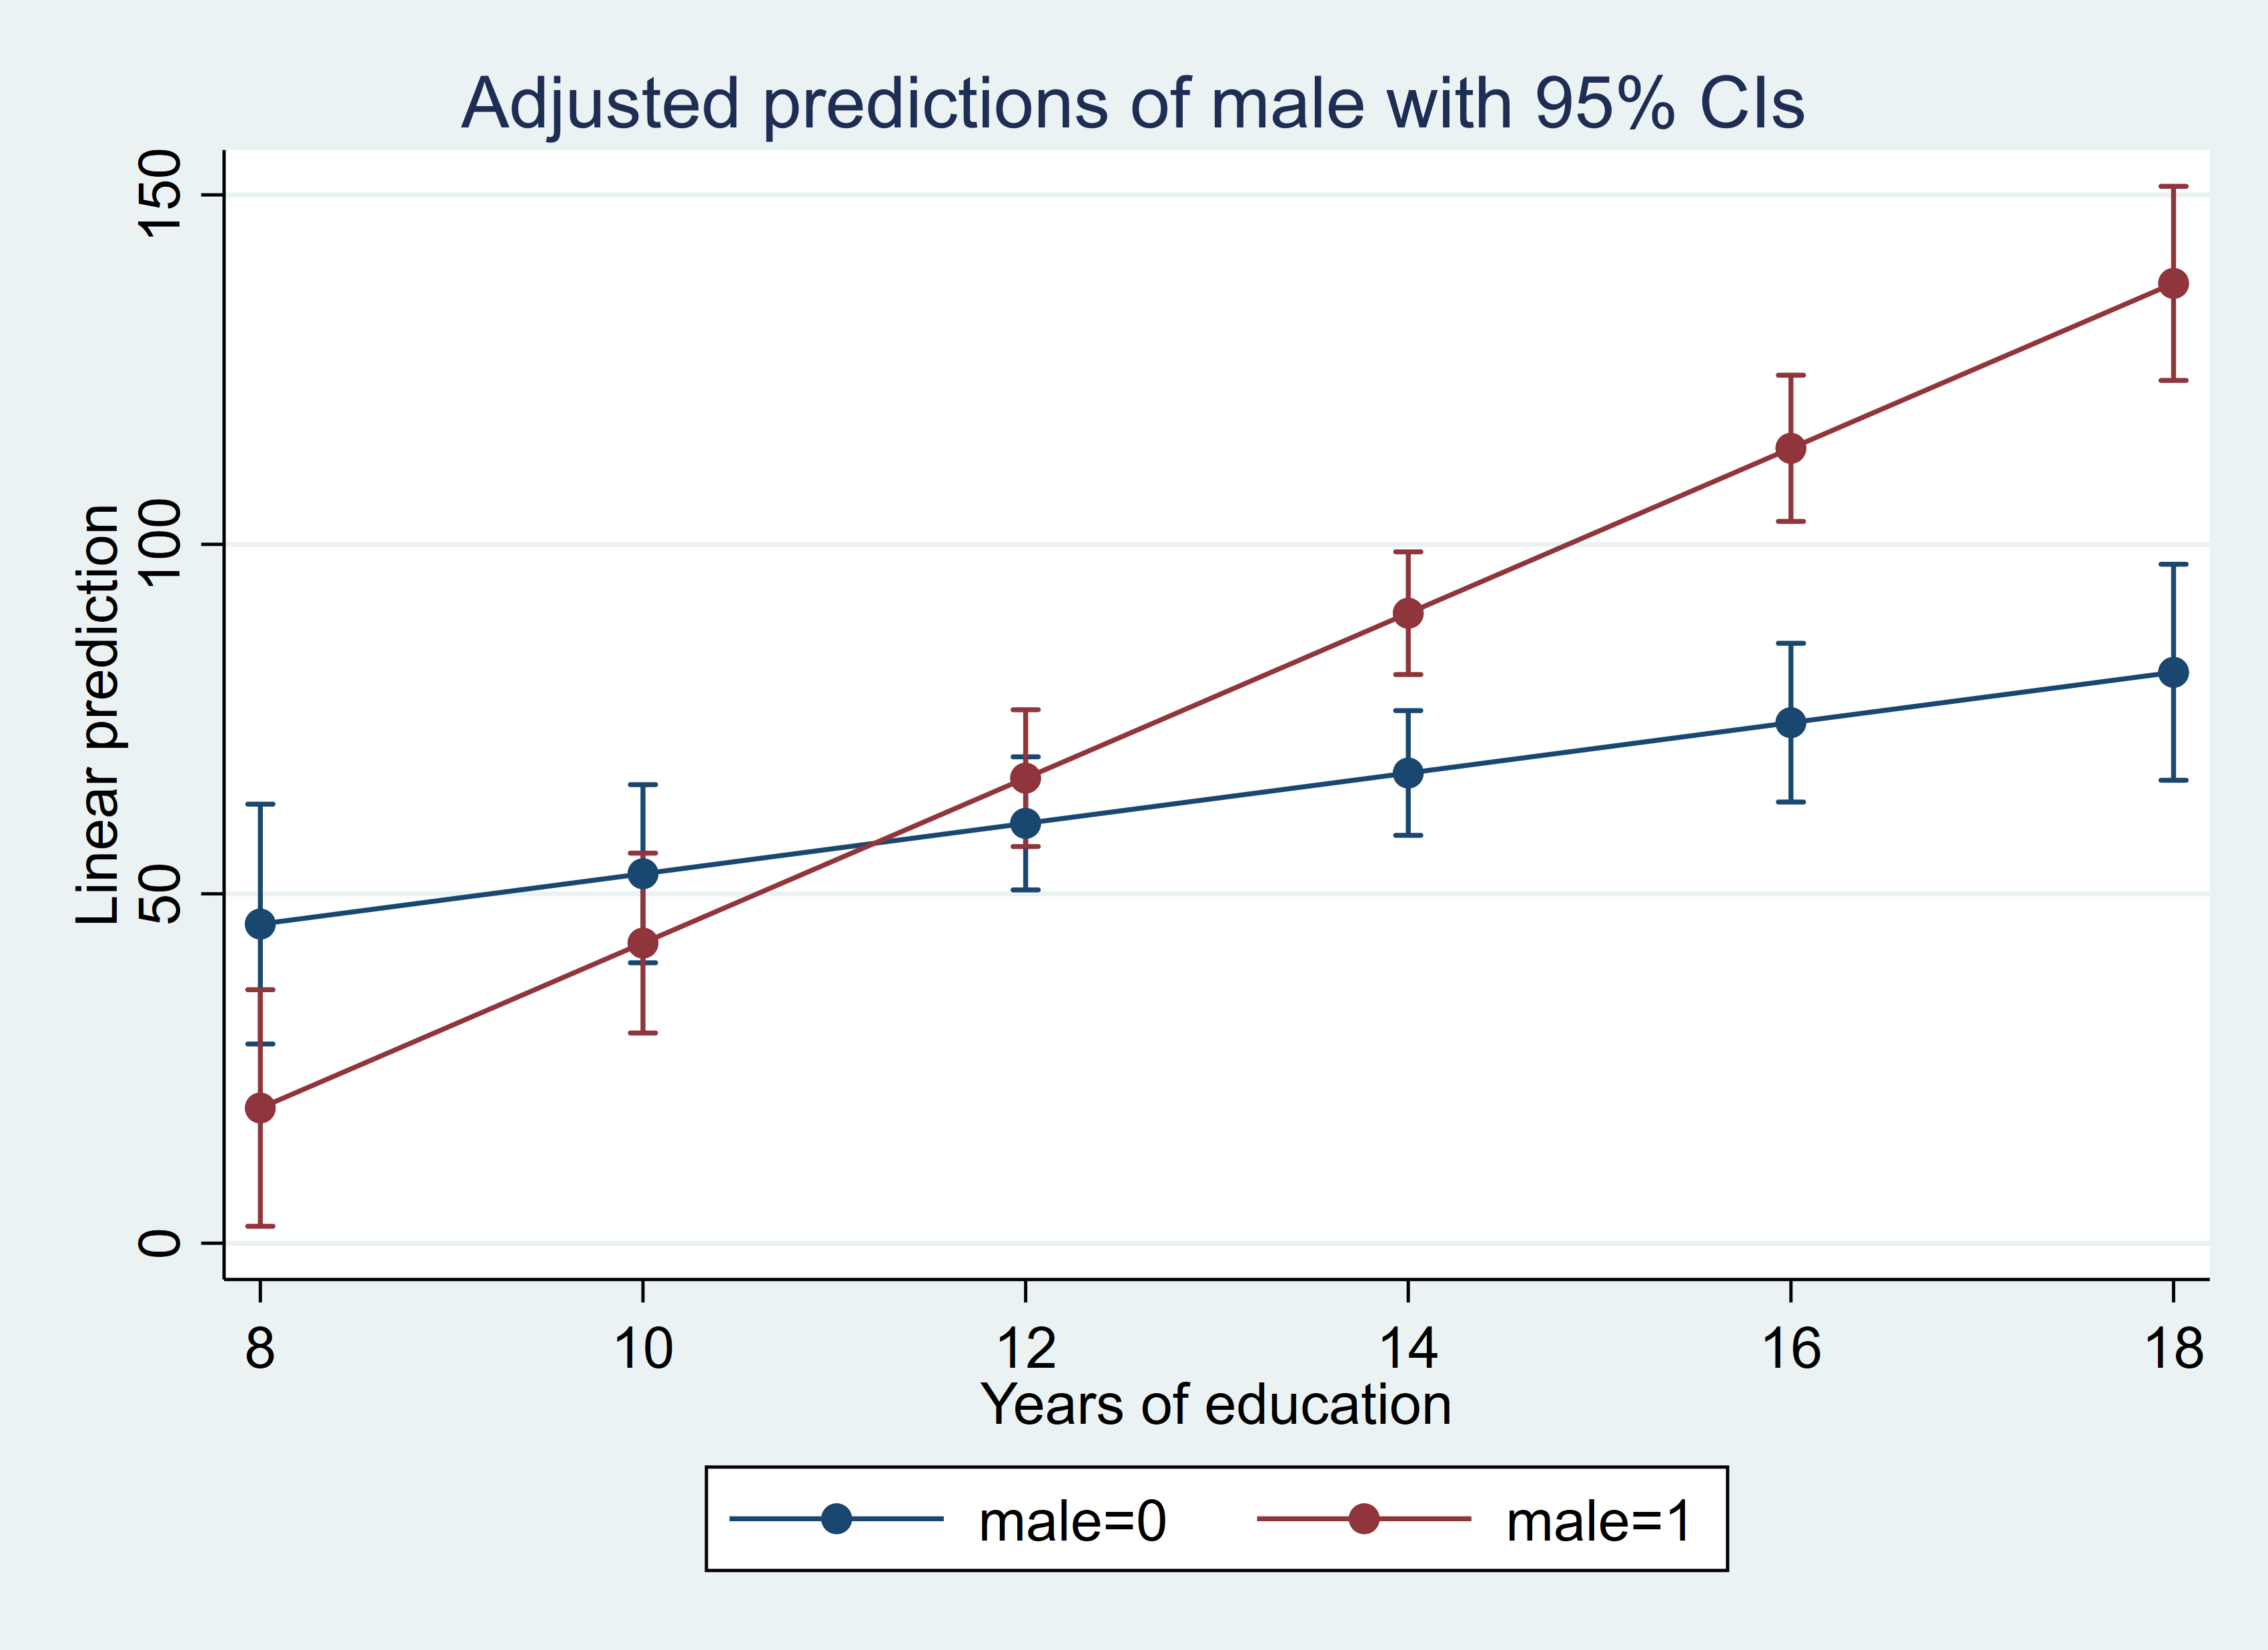

<i>The effect of educational attainment has on income is much stronger for men as compared to women.</i> This difference is statistically significant (see p-value of the interaction term in the regression output).

# Pratice
## Interactions between a categorical and numeric variables.
* Q1: Open the NHANES2 data (https://www.stata-press.com/data/r17/nhanes2.dta).
* Q2: Run a regression with body mass index (bmi) as the outcome variables and with the following independent variables: rural, female, age, and an interaction between age and female. 
* Q3: What is the minimum, and maximum of age?
* Q4: Based on the min and max, decide a interval to use for the margins command. Use the margins command to make a graph comparing the interactions. Plot the margins results.
* Q5: Write a sentence summarizing the results of the interaction.

## Interactions between two numeric variables

Let's say, we want to fit a model predicting asthma hospital visits across independent variables poverty, particular matter 2.5, and lingusitic isolation.
    
<b>Additive model:</b>

<center>$(Asthma_i)=\beta_0+\beta_1*(poverty_i)+\beta_2*(PM25_i)+\beta_3*(LingIsolation_i)$

Let's say we think the effect of Lingusitic Isolation intake changes the relationship between particular matter 2.5 to asthma

<b>Interaction model:</b>

<center>$(Asthma_i)=\beta_0+\beta_1*(poverty_i)+\beta_2*(PM25_i)+\beta_3*(LingIsolation_i)+\beta_4*(PM25_ixLingIsol_i)$

In [97]:
*Use dataset from last week's practice
use "D:\documents copy\teaching\SOC 206 Spring 2024\Week2\ces_sd_imperial.dta", clear
desc




Contains data from D:\documents copy\teaching\SOC 206 Spring 2024\Week2\ces_sd_i
> mperial.dta
  obs:           658                          
 vars:            10                          10 Apr 2024 08:25
 size:        50,666                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
CensusTract     double  %10.0g                Census Tract
TotalPopulation long    %10.0g                Total Population
CaliforniaCou~y str15   %15s                  California County
ZIP             long    %10.0g                ZIP
PM25            double  %10.0g                PM2.5
Asthma          double  %10.0g                Asthma
Cardiovascula~e double  %10.0g                Cardiovascular Disease
LinguisticIso~n double  %10.0g                Linguistic Isolation
Pov

In [98]:
destring LowBirthWeight, ignore("%") replace

LowBirthWeight: character % removed; replaced as double
(11 missing values generated)


In [100]:
*Additive model
regress Asthma Poverty PM25 LinguisticIsolation


      Source |       SS           df       MS      Number of obs   =       639
-------------+----------------------------------   F(3, 635)       =     89.56
       Model |  130440.492         3  43480.1639   Prob > F        =    0.0000
    Residual |  308293.011       635  485.500805   R-squared       =    0.2973
-------------+----------------------------------   Adj R-squared   =    0.2940
       Total |  438733.503       638  687.670068   Root MSE        =    22.034

-------------------------------------------------------------------------------
       Asthma |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
      Poverty |    .651268   .0689725     9.44   0.000     .5158262    .7867097
         PM25 |   2.158591   .7214805     2.99   0.003     .7418144    3.575367
LinguisticI~n |   .2180056   .1481079     1.47   0.142    -.0728349    .5088462
        _cons |   -3.33461   7.683883    -0.

<center>$(Asthma_i)=\beta_0+\beta_1*(poverty_i)+\beta_2*(PM25_i)+\beta_3*(LingIsolation_i)$

<center>$(Asthma_i)=\beta_0+0.65*(poverty_i)+2.16*(PM25_i)+0.22*(LingIsolation_i)$

In [127]:
*interaction model
regress Asthma Poverty c.PM25##c.LinguisticIsolation


      Source |       SS           df       MS      Number of obs   =       639
-------------+----------------------------------   F(4, 634)       =     73.30
       Model |  138735.202         4  34683.8006   Prob > F        =    0.0000
    Residual |  299998.301       634   473.18344   R-squared       =    0.3162
-------------+----------------------------------   Adj R-squared   =    0.3119
       Total |  438733.503       638  687.670068   Root MSE        =    21.753

-------------------------------------------------------------------------------
       Asthma |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
      Poverty |   .6368128   .0681794     9.34   0.000      .502928    .7706976
         PM25 |   5.637304   1.094382     5.15   0.000     3.488252    7.786356
LinguisticI~n |   3.361752   .7649686     4.39   0.000     1.859573     4.86393
              |
       c.PM25#|
           c

<center>$(Asthma_i)=\beta_0+\beta_1*(poverty_i)+\beta_2*(PM25_i)+\beta_3*(LingIsolation_i)+\beta_4*(PM25_ixLingIsol_i)$

<center>$(Asthma_i)=\beta_0+0.64*(poverty_i)+5.64*(PM25_i)+3.36*(LingIsolation_i)-0.29*(PM25_ixLingIsol_i)$

The interaction is negative generally telling us as Linguistic Isolation intake increases and Particular matter 2.5 decreases, there is a generally decrease in Asthma.
OR
The interaction is negative generally telling us as Linguistic Isolation intake decreases and Particular matter 2.5 increase, there is a generally decrease in Asthma.

In [128]:
tabstat Asthma Poverty PM25 LinguisticIsolation, stat(mean median min max)


   stats |    Asthma   Poverty      PM25  Lingui~n
---------+----------------------------------------
    mean |  42.94368  33.79462  10.54268  8.679656
     p50 |     36.02      29.5     10.37       5.5
     min |         0       2.5  7.021225         0
     max |    163.56      83.6     14.99      54.8
--------------------------------------------------


In [139]:
margins, dydx(PM25) at(LinguisticIsolation=(0(20)60)) vsquish


Average marginal effects                        Number of obs     =          1
Model VCE    : OLS

Expression   : Linear prediction, predict()
dy/dx w.r.t. : PM25
1._at        : Linguistic~n    =           0
2._at        : Linguistic~n    =          20
3._at        : Linguistic~n    =          40
4._at        : Linguistic~n    =          60

------------------------------------------------------------------------------
             |            Delta-method
             |      dy/dx   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
PM25         |
         _at |
          1  |   5.637304   1.094382     5.15   0.000     3.488252    7.786356
          2  |  -.1847857    .905866    -0.20   0.838    -1.963646    1.594075
          3  |  -6.006875   2.076268    -2.89   0.004    -10.08407   -1.929682
          4  |  -11.82897   3.415927    -3.46   0.001    -18.53686   -5.121066
---------------------------------

In [140]:
*This calculates the predicted values with specific PM25 and Linguistic Isolation values AND other variables are at average.
margins , at(PM25=(5(5)15) LinguisticIsolation=(0(20)60)) atmeans vsquish


Adjusted predictions                            Number of obs     =          1
Model VCE    : OLS

Expression   : Linear prediction, predict()
1._at        : Poverty         =        82.8 (mean)
               PM25            =           5
               Linguistic~n    =           0
2._at        : Poverty         =        82.8 (mean)
               PM25            =           5
               Linguistic~n    =          20
3._at        : Poverty         =        82.8 (mean)
               PM25            =           5
               Linguistic~n    =          40
4._at        : Poverty         =        82.8 (mean)
               PM25            =           5
               Linguistic~n    =          60
5._at        : Poverty         =        82.8 (mean)
               PM25            =          10
               Linguistic~n    =           0
6._at        : Poverty         =        82.8 (mean)
               PM25            =          10
               Linguistic~n    =          20
7._a



  Variables that uniquely identify margins: PM25 LinguisticIsolation


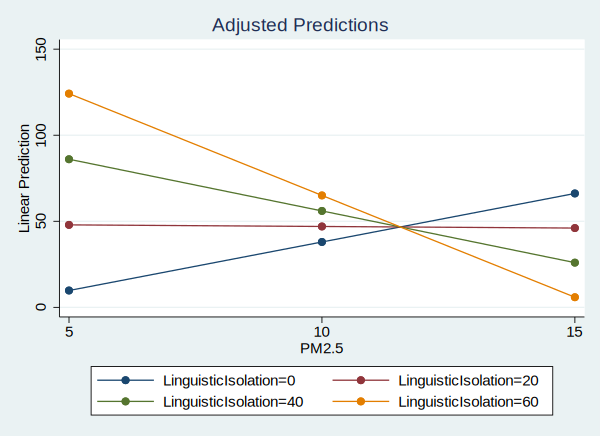



(file PM25Ling.png written in PNG format)


In [130]:
marginsplot, noci
graph export "PM25Ling.png", replace width(3400)

We can see the effect of PM 2.5 on Asthma is strongest at the lowest and highest values of Linguistic isolation. For example, we see the slope between PM 2.5 and Asthma gets steeper as Linguistic Isolation increases/decreases. This relationship is statistically significant.

* We see the steepest slope of PM 2.5 and Asthma is at Lingustic Isolation at 60% and 0%. 
* When Linguistic isolation is at 60%, as PM 2.5 increases there is a corresponding decrease in Asthma.
* When Linguistic isolation is at 0%, as PM 2.5 increases there is a corresponding increase in Asthma.
* 40% and 20% Ligusitic Isolation have flatter slopes indicating not much change.
* There is a critical junction at PM 2.5 12 where 0% Linguistic Isolation surpasses 60% Lingusitic Isolation in most Asthma.
* We need more context to understand this. Contributors of PM2.5 are cars and industrial. Perheps neighborhoods with more limited English speakers are located in more periphery neighborhoods due to central/downtown/highways being more desirable for commuting and therefore can be more expensive.

In [157]:
rename LinguisticIsolation LingIsol

In [158]:
regress Asthma c.PM25##c.LingIsol##c.Poverty


      Source |       SS           df       MS      Number of obs   =       639
-------------+----------------------------------   F(7, 631)       =     42.72
       Model |  141066.607         7  20152.3725   Prob > F        =    0.0000
    Residual |  297666.896       631  471.738345   R-squared       =    0.3215
-------------+----------------------------------   Adj R-squared   =    0.3140
       Total |  438733.503       638  687.670068   Root MSE        =     21.72

------------------------------------------------------------------------------
      Asthma |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        PM25 |    2.44248   2.313999     1.06   0.292    -2.101592    6.986552
    LingIsol |   3.201279   2.830144     1.13   0.258     -2.35636    8.758919
             |
      c.PM25#|
  c.LingIsol |  -.2378024   .2623016    -0.91   0.365    -.7528921    .2772872
             |
     

In [159]:
tabstat Asthma Poverty PM25 LingIsol, stat(mean median min max)


   stats |    Asthma   Poverty      PM25  LingIsol
---------+----------------------------------------
    mean |  42.94368  33.79462  10.54268  8.679656
     p50 |     36.02      29.5     10.37       5.5
     min |         0       2.5  7.021225         0
     max |    163.56      83.6     14.99      54.8
--------------------------------------------------


In [160]:
margins, dydx(PM25) at(LingIsol=(0(30)60) Poverty=(0(40)80)) vsquish


Average marginal effects                        Number of obs     =        639
Model VCE    : OLS

Expression   : Linear prediction, predict()
dy/dx w.r.t. : PM25
1._at        : LingIsol        =           0
               Poverty         =           0
2._at        : LingIsol        =           0
               Poverty         =          40
3._at        : LingIsol        =           0
               Poverty         =          80
4._at        : LingIsol        =          30
               Poverty         =           0
5._at        : LingIsol        =          30
               Poverty         =          40
6._at        : LingIsol        =          30
               Poverty         =          80
7._at        : LingIsol        =          60
               Poverty         =           0
8._at        : LingIsol        =          60
               Poverty         =          40
9._at        : LingIsol        =          60
               Poverty         =          80

-------------------------

In [161]:
margins, at(PM25=(0(7.5)15) LingIsol=(0(30)60) Poverty=(0(40)80)) vsquish


Adjusted predictions                            Number of obs     =        639
Model VCE    : OLS

Expression   : Linear prediction, predict()
1._at        : PM25            =           0
               LingIsol        =           0
               Poverty         =           0
2._at        : PM25            =           0
               LingIsol        =           0
               Poverty         =          40
3._at        : PM25            =           0
               LingIsol        =           0
               Poverty         =          80
4._at        : PM25            =           0
               LingIsol        =          30
               Poverty         =           0
5._at        : PM25            =           0
               LingIsol        =          30
               Poverty         =          40
6._at        : PM25            =           0
               LingIsol        =          30
               Poverty         =          80
7._at        : PM25            =           0
 



  Variables that uniquely identify margins: PM25 LingIsol Poverty


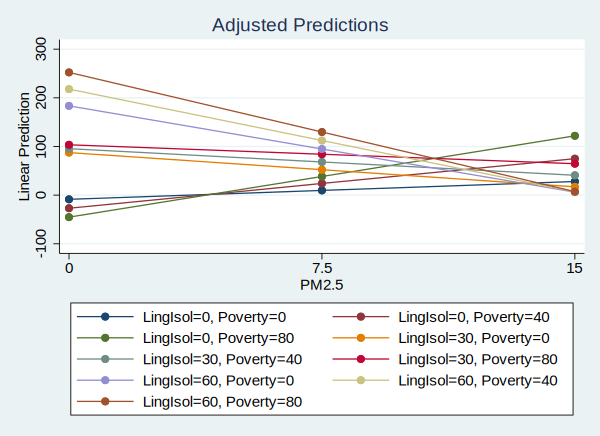



(file PM25Lingpoverty.png written in PNG format)


In [163]:
marginsplot, noci
graph export "PM25Lingpoverty.png", replace width(3400)

* For communities with high (60%) limited English regardless of poverty have similar trends of PM2.5 and Asthma.
* For communities with median (30%) limited English regardless of poverty have similar trends of PM2.5 and asthma.
* Poverty does have moderating effects for communities with low (0%) limited English and its effect of PM2.5 and asthma. For example, the steepest slope of PM2.5 and asthma is the low limited Enflish and highest poverty.
* Final remarks, we see poverty has an effect on PM2.5 and Asthma for only low limited English communities

# Practice
## Interactions between two numeric variables.
* Q1: Open the NHANES2 data (https://www.stata-press.com/data/r17/nhanes2.dta). Use the "codebook" command for tcresult.
* Q2: Run a regression with body mass index (bmi) as the outcome variables and with the following independent variables: tcresult, female, and age. 
* Q3: Run a regression with body mass index (bmi) as the outcome variables and with the following independent variables: tcresult, female, age, and an interaction between age and tcresult. 
* Q3: What is the minimum, and maximum of age and tcresult?
* Q4: Based on the min and max, decide intervals to use for the margins command. Use the margins command to make a graph comparing the interactions. Plot the margins results.
* Q5: Write a sentence summarizing the results of the interaction.